In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import time,timedelta,datetime,date
import datetime

import os
currentFile=os.path.abspath(os.getcwd())
print(currentFile)
inten=currentFile.split('PatronesComportamiento-Notebooks/')


/home/ana/Documentos/TFG/PatronesComportamiento/Notebooks/PatronesComportamiento-Notebooks/PatronesComportamiento


# Estudio días clúster 3

En primer lugar, queremos representar gráficamente aquellos días que se salen de la norma, pues al hacer un clustering de 3, los ha clasificado fuera de aquel clúster dedicado a los días de diario y fiera de aquel de días de fin de semana, siendo estos días seleccionados candidatos de uno de los dos grupos.
El objetivo de esta representación, es sobre todo intentar ver máximos y mínimos claros que pueden explicar esta clasificación y comportamiento anómalo, por tanto.

In [3]:
with open(str(currentFile)+'/dias_senalados/dic_dates.pkl', 'rb') as file:
        dic_dates=pickle.load(file)
print((dic_dates[2]))

[datetime.datetime(2021, 7, 24, 0, 0), datetime.datetime(2021, 6, 20, 0, 0), datetime.datetime(2022, 5, 22, 0, 0), datetime.datetime(2021, 2, 7, 0, 0), datetime.datetime(2022, 7, 31, 0, 0), datetime.datetime(2021, 11, 21, 0, 0), datetime.datetime(2022, 3, 13, 0, 0), datetime.datetime(2021, 4, 2, 0, 0), datetime.datetime(2021, 12, 25, 0, 0), datetime.datetime(2021, 4, 11, 0, 0), datetime.datetime(2021, 8, 28, 0, 0), datetime.datetime(2022, 8, 20, 0, 0), datetime.datetime(2021, 3, 7, 0, 0), datetime.datetime(2022, 7, 2, 0, 0), datetime.datetime(2022, 2, 28, 0, 0), datetime.datetime(2021, 3, 28, 0, 0), datetime.datetime(2022, 1, 9, 0, 0), datetime.datetime(2022, 10, 2, 0, 0), datetime.datetime(2021, 8, 16, 0, 0), datetime.datetime(2022, 4, 15, 0, 0), datetime.datetime(2022, 11, 6, 0, 0), datetime.datetime(2021, 7, 4, 0, 0), datetime.datetime(2022, 9, 4, 0, 0), datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2022, 4, 16, 0, 0), datetime.datetime(2021, 2, 28, 0, 0), datetime.datetime

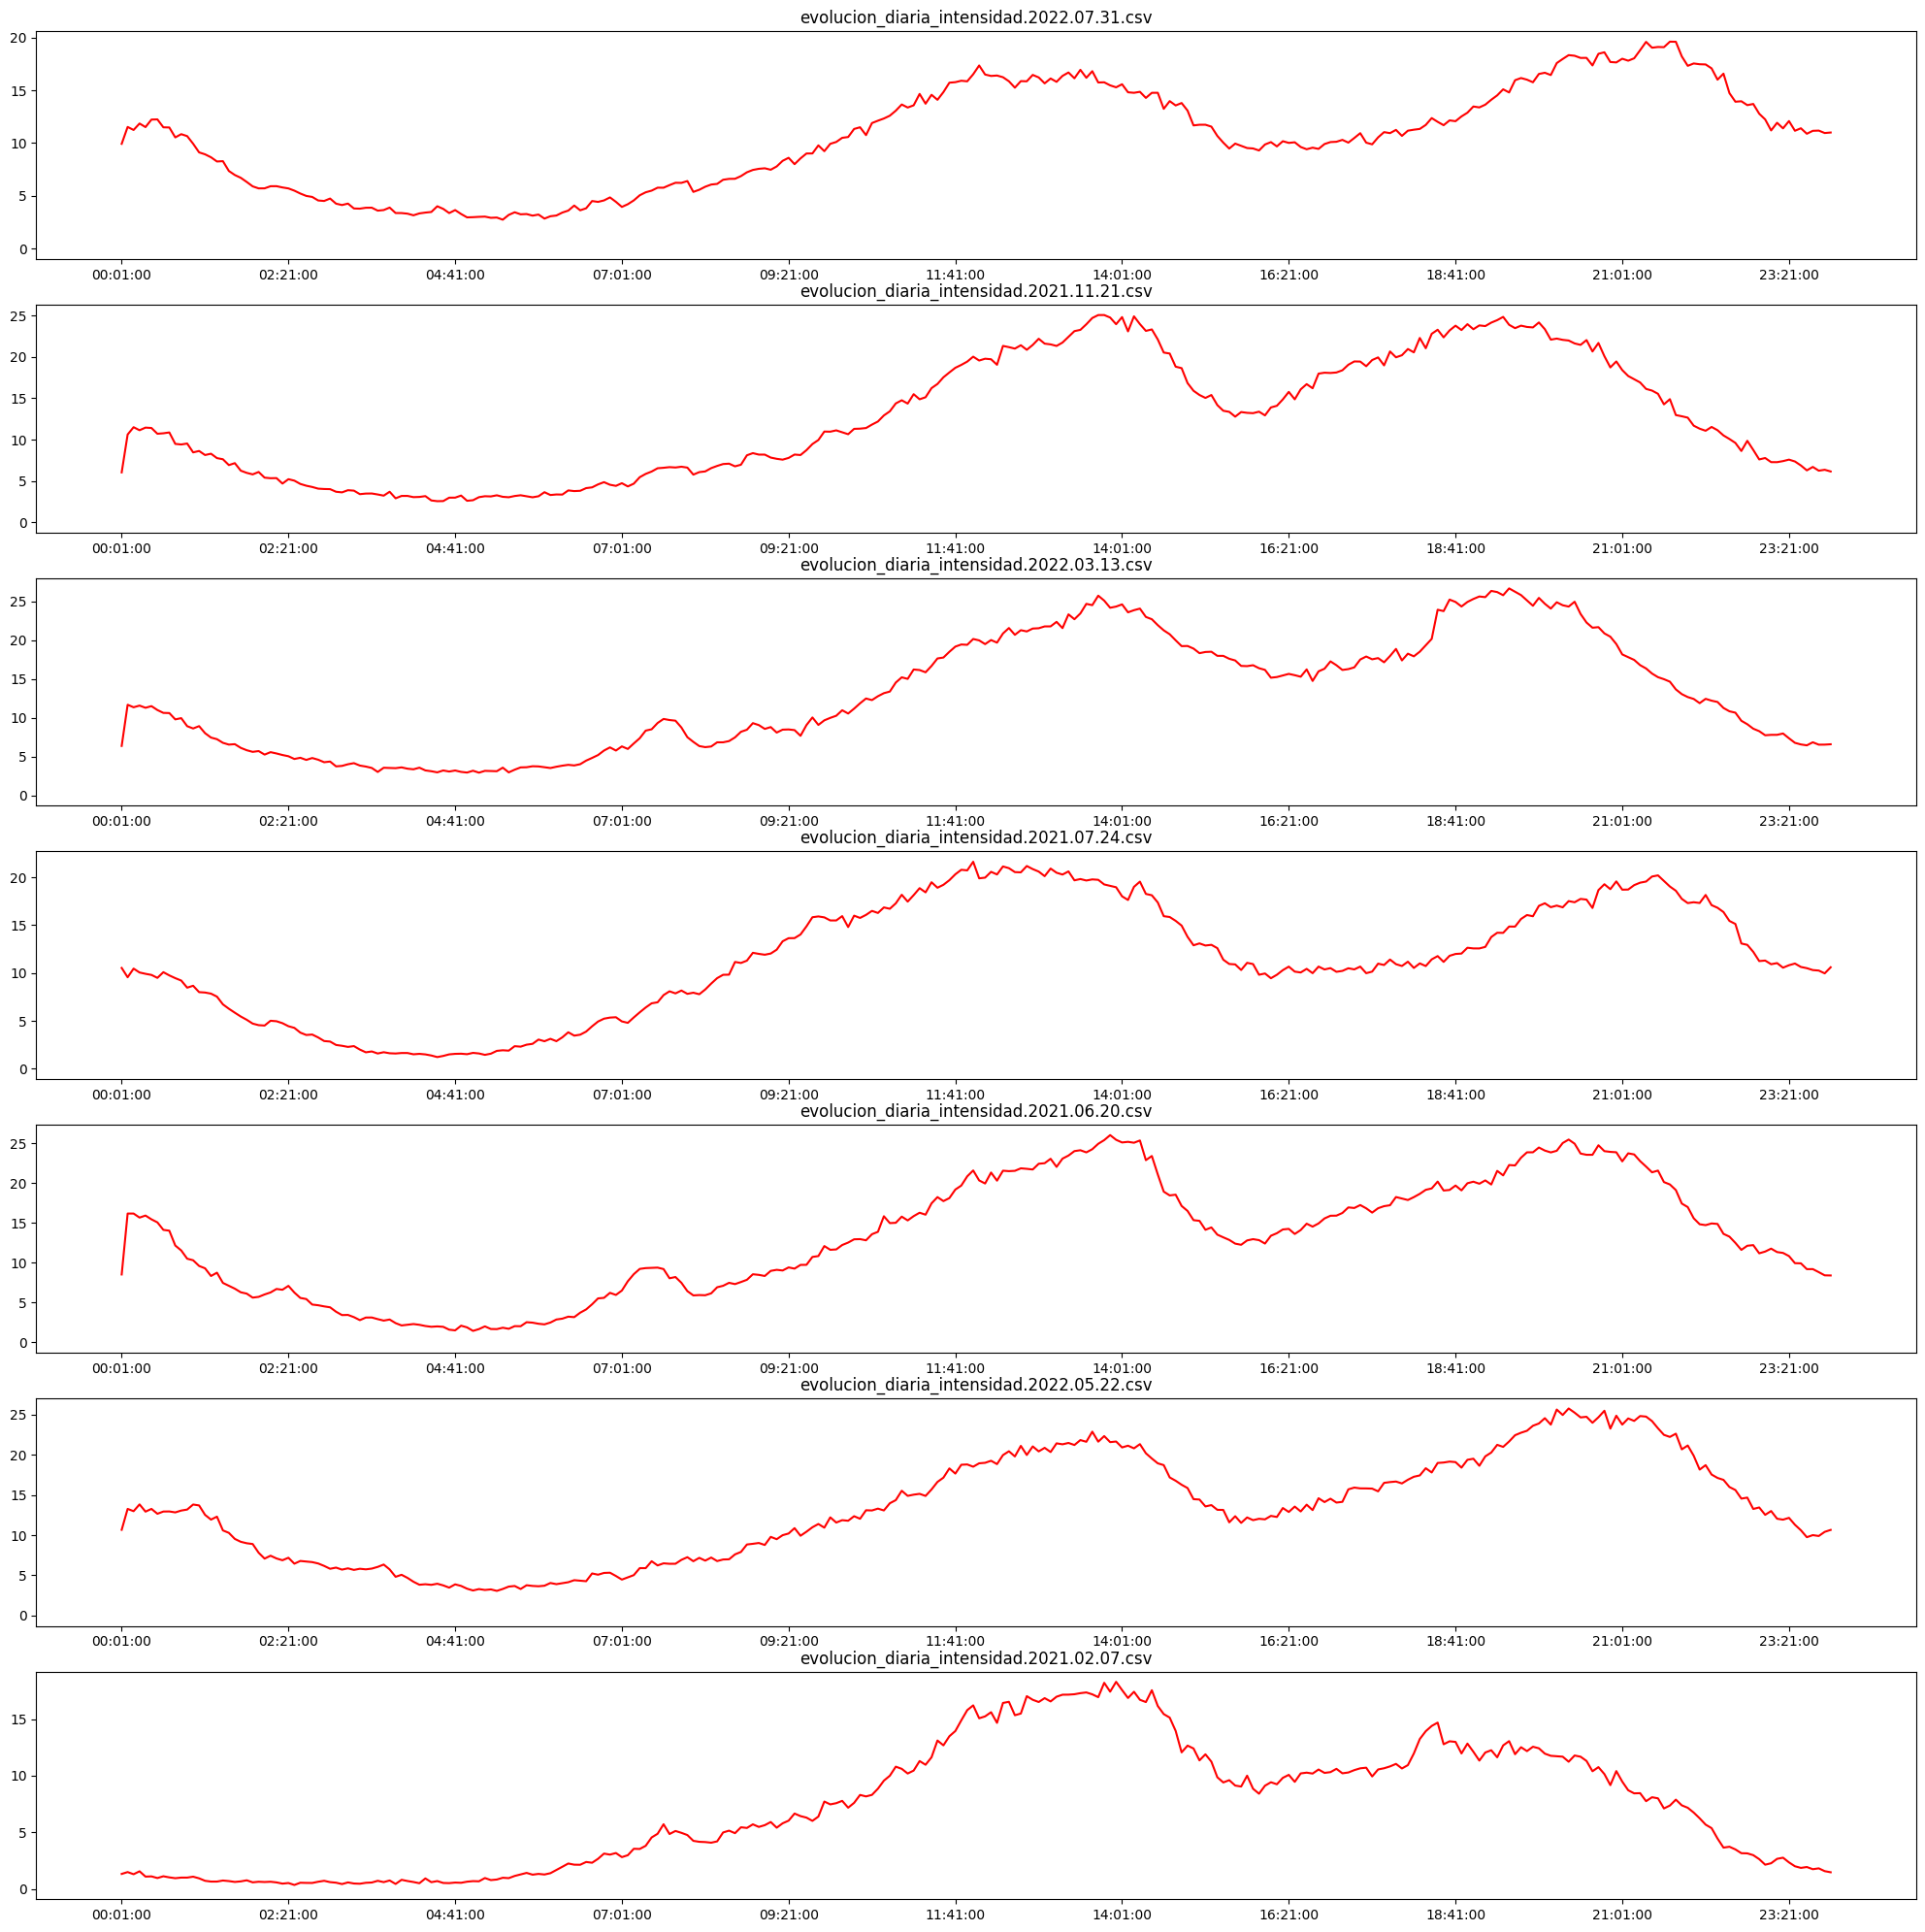

In [5]:
directory = str(inten[0])+'/intensOcupation'

fig,axs=plt.subplots(len(dic_dates[2][:7]),1,figsize=(25,25))
i=0
for v in dic_dates[2][:7]:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-4].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-4].set_xticks(xticks)
  axs[i-4].set_title(fileSelected)

  axs[i-4].plot(df, color='r')
  i+=1



Esta representación a simple vista no nos permite ver una clara diferencia, por ello hemos querido a continuación representar en color rojo los días anómalos y en verde días promedio que representen el mismo día de la semana.

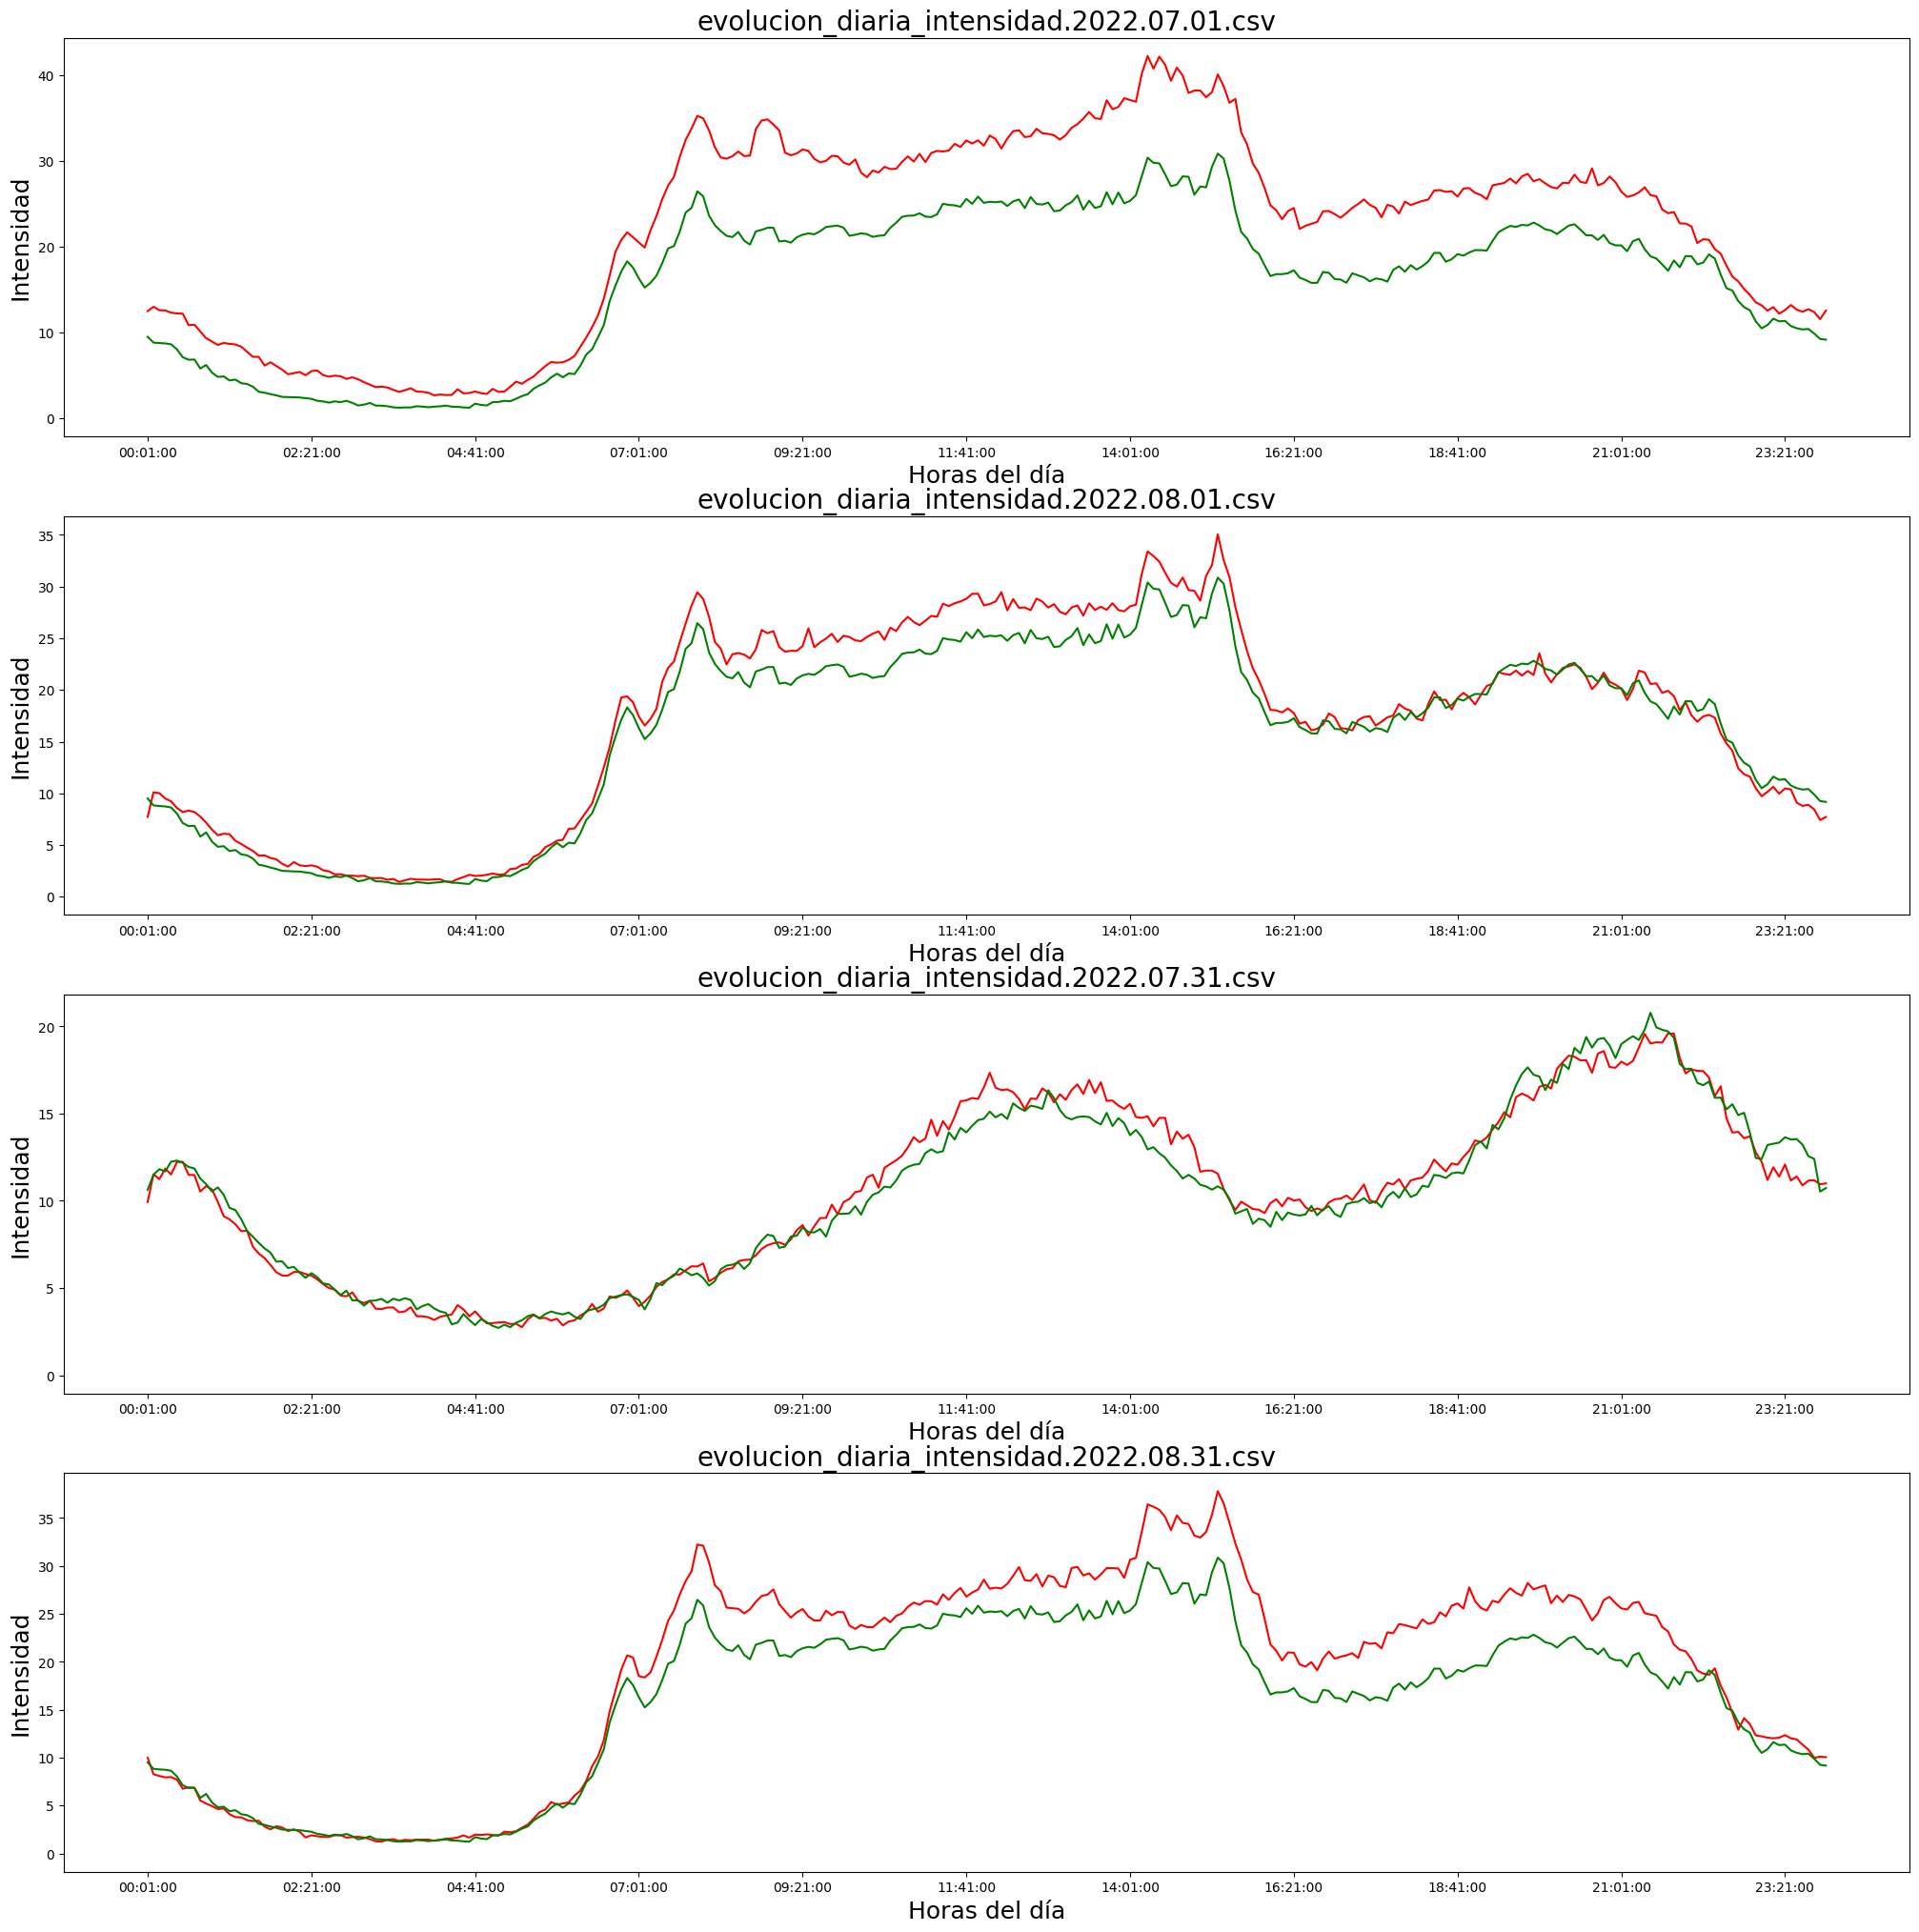

In [9]:
directory = str(inten[0])+'/intensOcupation'

vacation_dates=[datetime.datetime(2022,7,1,0,0),datetime.datetime(2022,8,1,0,0),
                datetime.datetime(2022,7,31,0,0),datetime.datetime(2022,8,31,0,0), 
                datetime.datetime(2022,8,10,0,0),datetime.datetime(2022,8,10,0,0),
                 datetime.datetime(2022,7,17,0,0),datetime.datetime(2022,8,10,0,0)]
fig,axs=plt.subplots(int(len(vacation_dates)/2),1,figsize=(25,25))
i=0
for v in vacation_dates:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  oldi=i
  if i>int(len(vacation_dates)/2)-1:
    color='g'
  else:
    color='r'
  
  i=i%int(len(vacation_dates)/2)

  axs[i-4].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-4].set_xticks(xticks)
  axs[i-4].set_ylabel('Intensidad',fontsize=18)
  axs[i-4].set_xlabel("Horas del día",fontsize=18)

  if color == 'r':
    axs[i-4].set_title(fileSelected,fontsize=20)

  axs[i-4].plot(df, color=color)
  i=oldi+1



Podemos observar que, sobre todo, sus diferencias radican en que hay un aumento generalizado en la intensidad.

# Concierto Red Hot Chilli Peppers

Este concierto tuvo lugar el 4 de junio de 2022, vamos a analizar como se comportaba la intensidad y la ocupación antes y después de empezar. Tendremos que analizar el 4 de junio y el día siguiente, pues termina en la madrugada del 5. De nuevo, añadimos en verde una gráfica que nos sirva como comparativa.

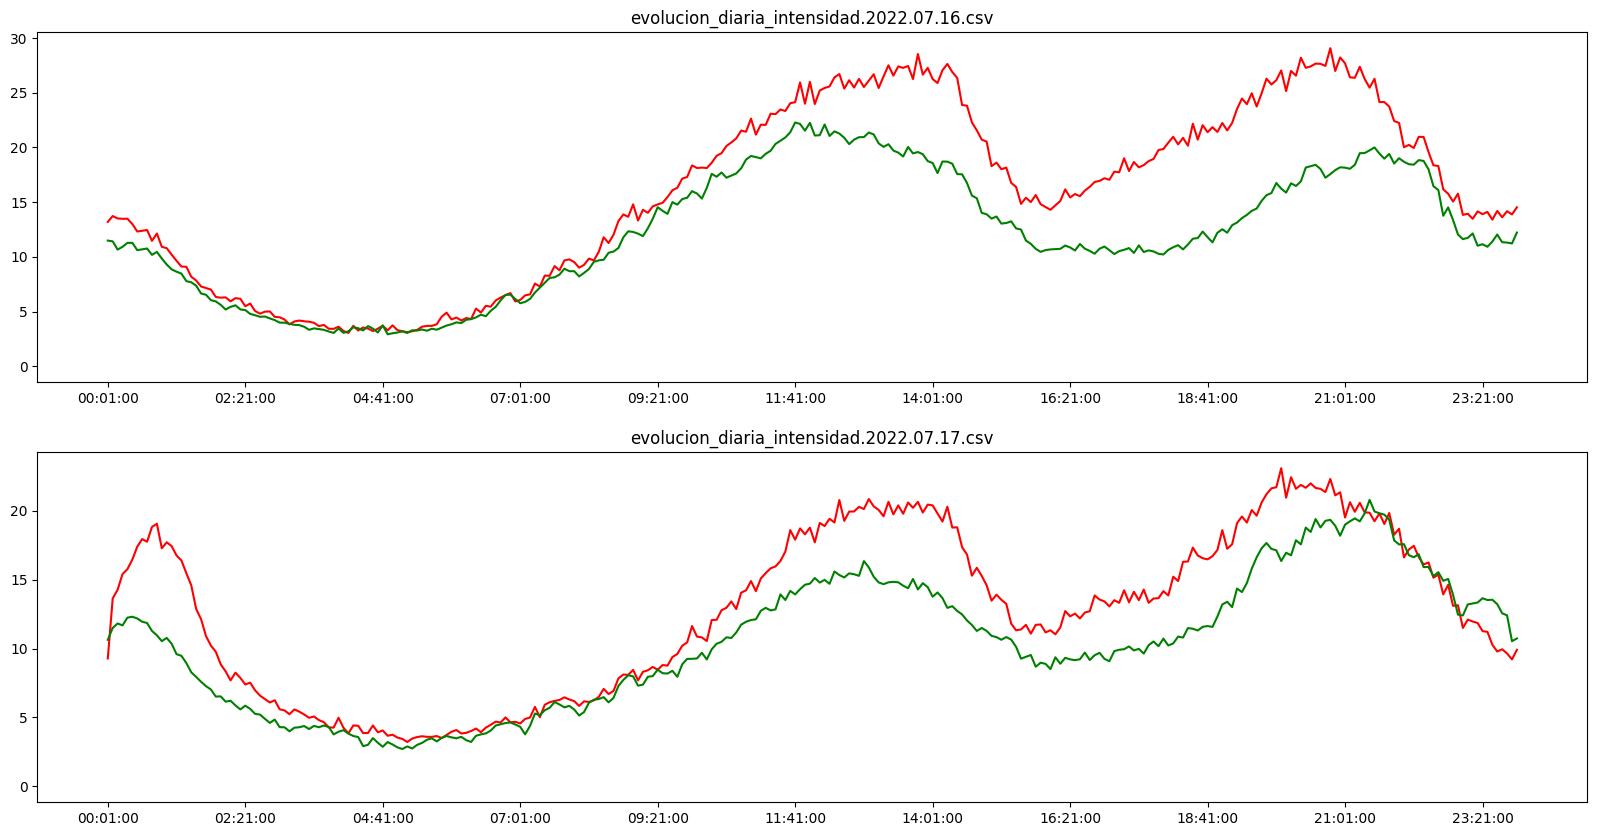

In [11]:
directory = str(inten[0])+'/intensOcupation'

vacation_dates=[datetime.datetime(2022,6,4,0,0),datetime.datetime(2022,6,5,0,0),datetime.datetime(2022, 7, 16, 0, 0),datetime.datetime(2022, 7, 17, 0, 0)]
fig,axs=plt.subplots(2,1,figsize=(20,10))
i=0
for v in vacation_dates:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  if i>1:
    color='g'
  else:
    color='r'
  oldi=i
  i=i%2
  axs[i-2].plot(dfA['time'], dfA['value'],alpha=0)
  axs[i-2].set_xticks(xticks)
  axs[i-2].set_title(fileSelected)

  axs[i-2].plot(df, color=color)
  i=oldi+1

La gráfica representa perfectamente el evento y podemos localizar máximos dónde se esperaba, es decir, a la entrada y a la salida de concierto.

# Concierto Puro Latino


Otros eventos que provocan el mismo comportamiento en las series temporales son los festivales, entre los festivales que tuvieron lugar en Sevilla en 2022 vamos a destacar **Puro Latino** e **Iconica Fest**, para este caso planteamos la siguiente hipótesis, debido a que la hora de entrada y salida no está tan estipulada y se prolonga durante 3 días de media, el comportamiento será similar al del caso de los desplazamientos vacacionales, un aumento generalizado en la intensidad.

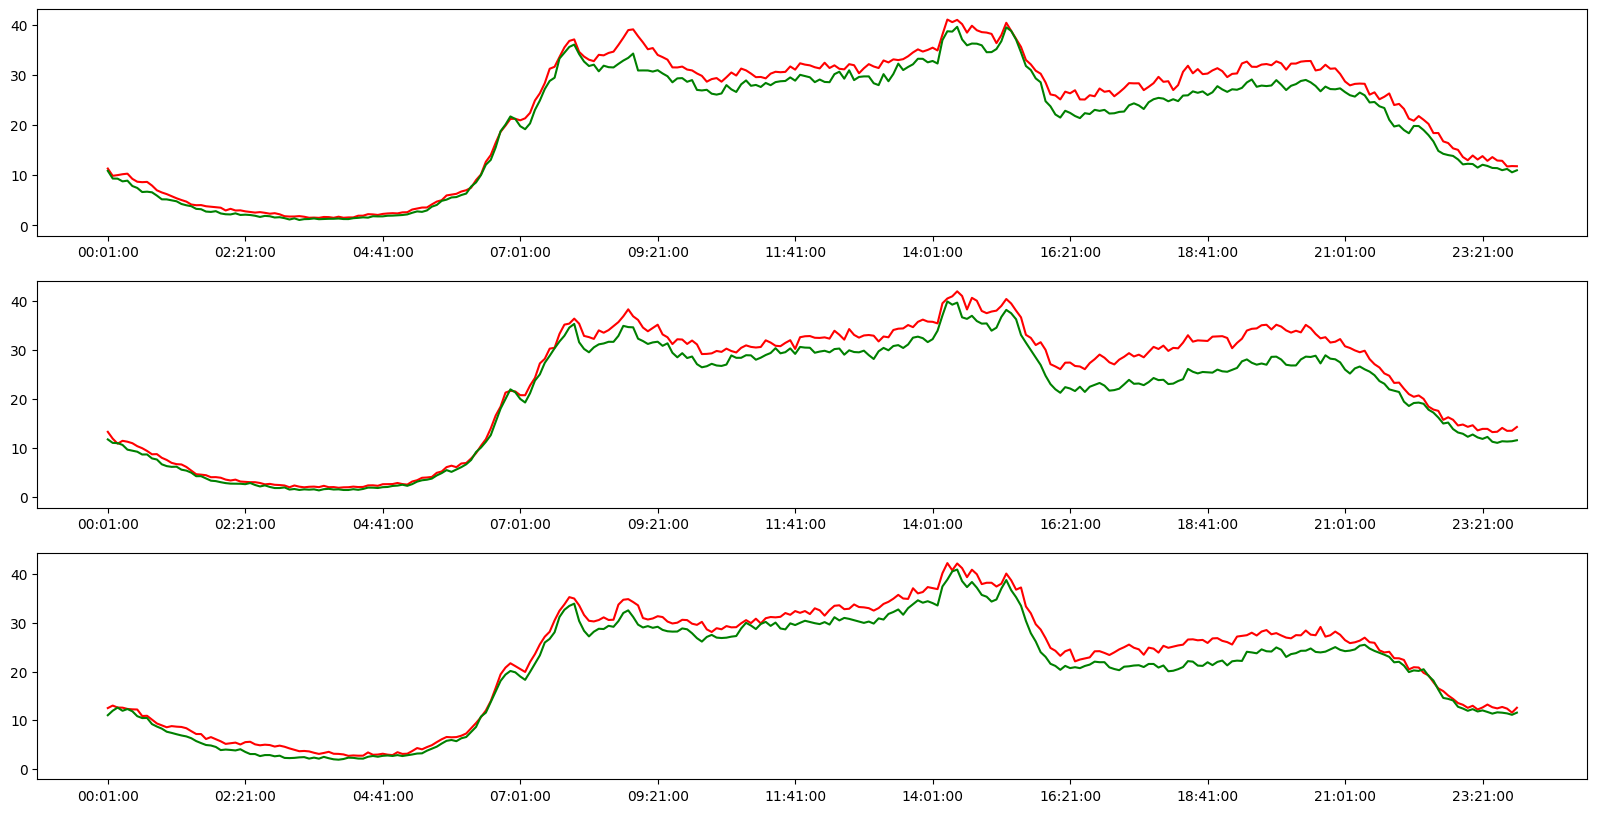

In [12]:
directory = str(inten[0])+'/intensOcupation'

vacation_dates=[datetime.datetime(2022,6,29,0,0),datetime.datetime(2022,6,30,0,0),datetime.datetime(2022, 7, 1, 0, 0),
                datetime.datetime(2022, 7, 6, 0, 0),datetime.datetime(2022, 7, 7, 0, 0),datetime.datetime(2022, 7, 8, 0, 0)]
fig,axs=plt.subplots(3,1,figsize=(20,10))
i=0
for v in vacation_dates:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  if i>2:
    color='g'
  else:
    color='r'
  oldi=i
  i=i%3
  axs[i-3].plot(dfA['time'], dfA['value'],alpha=0)
  axs[i-3].set_xticks(xticks)
  #axs[i-3].set_title(fileSelected)

  axs[i-3].plot(df, color=color)
  i=oldi+1

Como se observa, ambas series temporales tienen un comportamiento muy similar, y si comparamos los máximos con los de la gráfica ver de de la figura superior están a la misma altura que los días de vuelta de vacaciones de esa semana. Otra observación es que los días que tuvieron lugar el festival Puro Latino la intensidad es generalmente mayor, lo que se podría achacar a que este tuvo lugar en la Cartuja, zona de Sevilla a la que se un mayor porcentaje de personas acceden en vehículo que a la plaza de España, donde tuvo lugar el Icónica Fest.

#Nochebuena 2021

2021 fue el año posterior a la cuarentena, por lo que era el primer año en el que la gente se podía reunir pero con toque de queda. Estas gráficas simplemente buscan mostrar como llegadas las luces hay un pico de desplazamientos debido a las vueltas a casa de las distintas familias. Concretamente en la madrugada del 25 de diciembre.

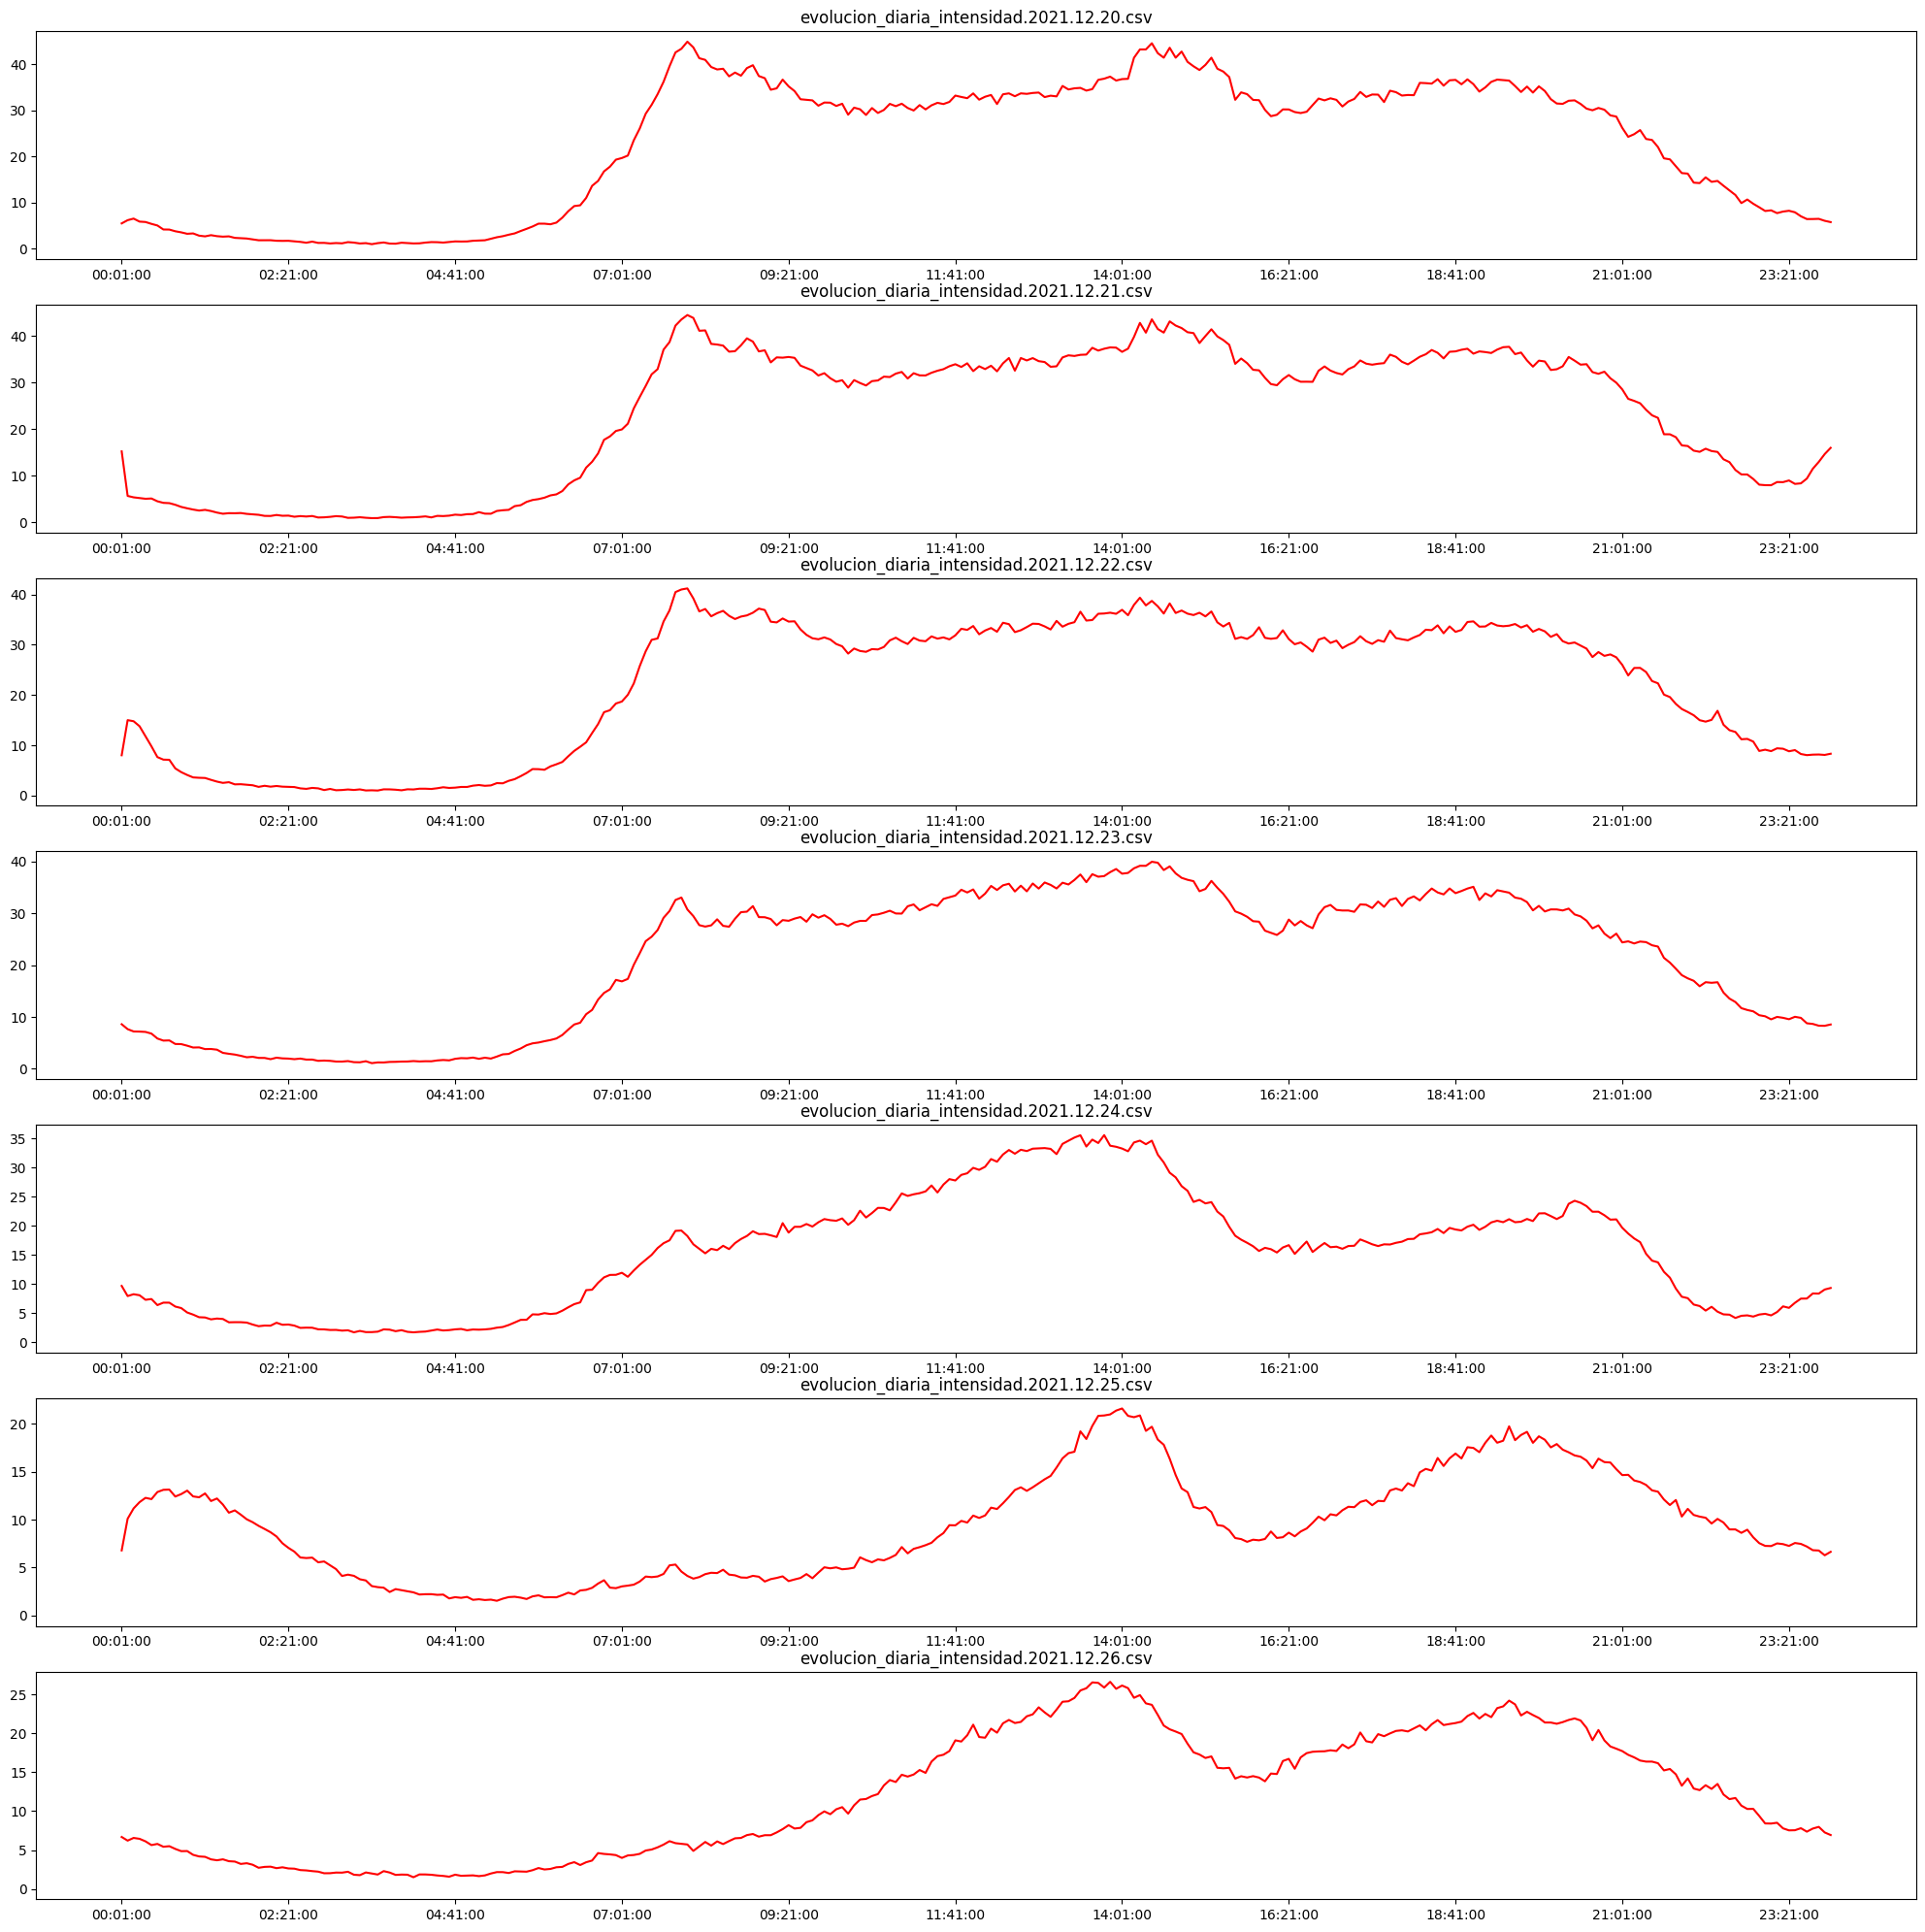

In [13]:
directory = str(inten[0])+'/intensOcupation'
fig, axs = plt.subplots(7,1,figsize=(25,25))
for i in range(20,27):

  if i <10:

    fileSelected='evolucion_diaria_intensidad.2021.12.0'+str(i)+'.csv'
  else:
    fileSelected='evolucion_diaria_intensidad.2021.12.'+str(i)+'.csv'


  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]


  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]

  axs[i-20].plot(dfA['time'], dfA['value'], alpha=0)
  axs[i-20].set_xticks(xticks)
  axs[i-20].set_title(fileSelected)
  axs[i-20].plot(df, color='r')

# Partido Sevilla

 Es importante identificar la zona de Sevilla en la que tiene lugar el encuentro para plantear la hipótesis de qué comportamiento tomará la serie temporal. Ya vimos en el ejemplo de los festivales que, la zona en la que tenga lugar el evento puede afectar al aumento de la intensidad. El Real Betis Balonpié (estadio Benito Villamarín) tiene su estadio en la zona de Heliopolis zona a la cual llegan tan sólo 4 autobuses: 02, 03, 06, 34, 35, LS y M-132 y cercanías:. En cambio, el otro equipo, Sevilla Fútbol Club (estadio Ramón Sánchez Pizjuán) tiene su estadio en el barrio de Nervión al cual llegan las líneas de bus: 02, 05, 20, 21, 22, 24, 27, 28, 29, 32, 39 52, 53, B3, B4, C1, C2, LE, LN y LS, cercanías:  las dos de metro. Esto nos indica que para acudir a los encuentros en el Sánchez Pizjuán se podría llegar desde cualquier zona de Sevilla usando transporte público, lo que aligera mucho el tráfico. 



En la figura inferior se ha superpuesto a cada día de partido del **Sevilla** un día promedio, aclarar que si un partido cae un domingo habrá que escoger un domingo promedio y si cae en jueves pues un jueves promedio.. En esto ejemplos podemos observar que antes del partido la intensidad no aumenta respecto a la norma o al menos no en gran medida y es al finalizar el encuentro cuando vemos el comportamiento anómalo.



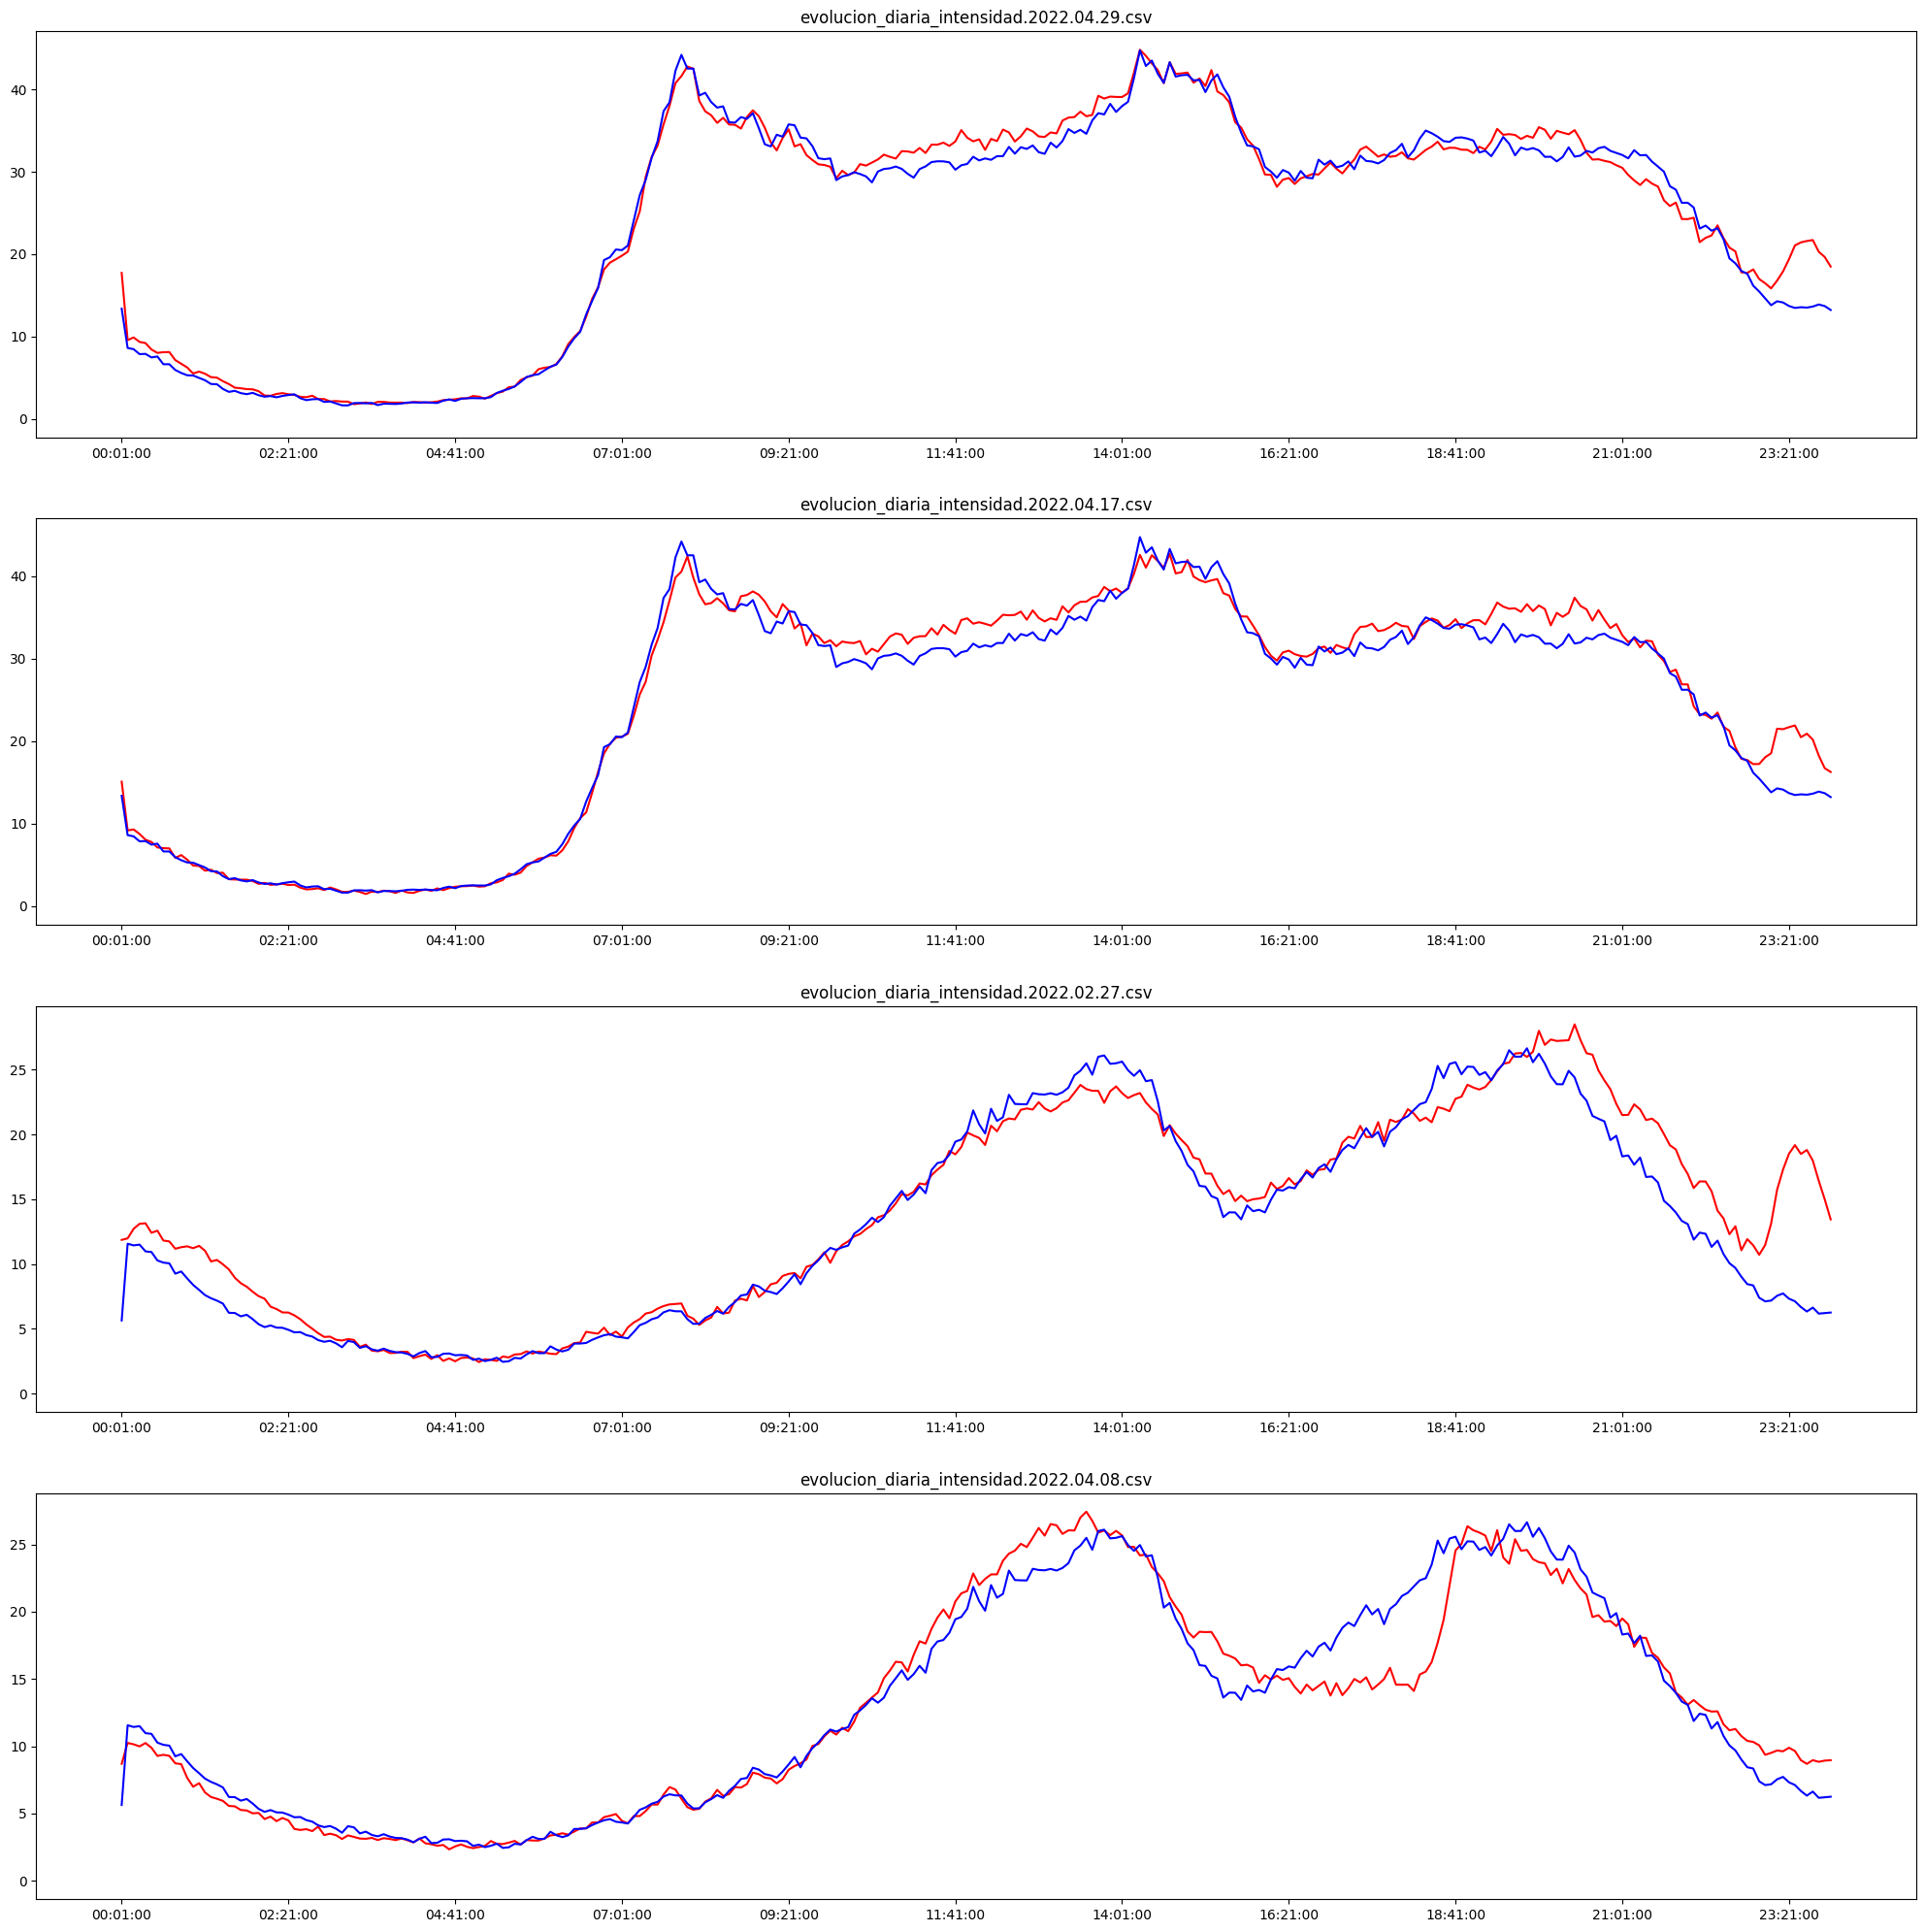

In [14]:
directory = str(inten[0])+'/intensOcupation'

match_day=[datetime.datetime(2022,4,8,0,0),datetime.datetime(2022,4,29,0,0),datetime.datetime(2022,4,17,0,0),datetime.datetime(2022,2,27,0,0),
                datetime.datetime(2022, 4, 1, 0, 0), datetime.datetime(2022, 4, 1, 0, 0), datetime.datetime(2022, 2, 13, 0, 0), datetime.datetime(2022, 2, 13, 0, 0)]
fig,axs=plt.subplots(4,1,figsize=(25,25))
i=0
for v in match_day:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  if i>3:
    color='b'
  else:
    color='r'
    axs[i-1].set_title(fileSelected)

  oldi=i
  i=i%4
  axs[i-4].plot(dfA['time'], dfA['value'],alpha=0)
  axs[i-4].set_xticks(xticks)

  axs[i-4].plot(df, color=color)
  i=oldi+1

# Partido Betis

Por otro lado hagamos lo mismo para partidos del **Betis**, al ser en otra zona veamos si el comportamiento se ajusta a nuestra hipótesis. Como se observa en la figura inferior cuando se trata de partidos en el Benito Villamarín podemos observar un aumento de la intensidad momentos antes del comienzo del encuentro y al finalizar un pico mostrando el aumento de la la afluencia de vehículos a la salida del mismo. Por tanto, e cumple nuestra hipótesis. No todos los casos son iguales, por ejemplo, el caso del 15 de enero, es decir, la segunda gráfica empezando por arriba fue un derbi Sevillano ( Betis contra Sevilla) por lo que el movimiento de personas es mayor en toda la ciudad por lo general que en otro enfrentamiento.

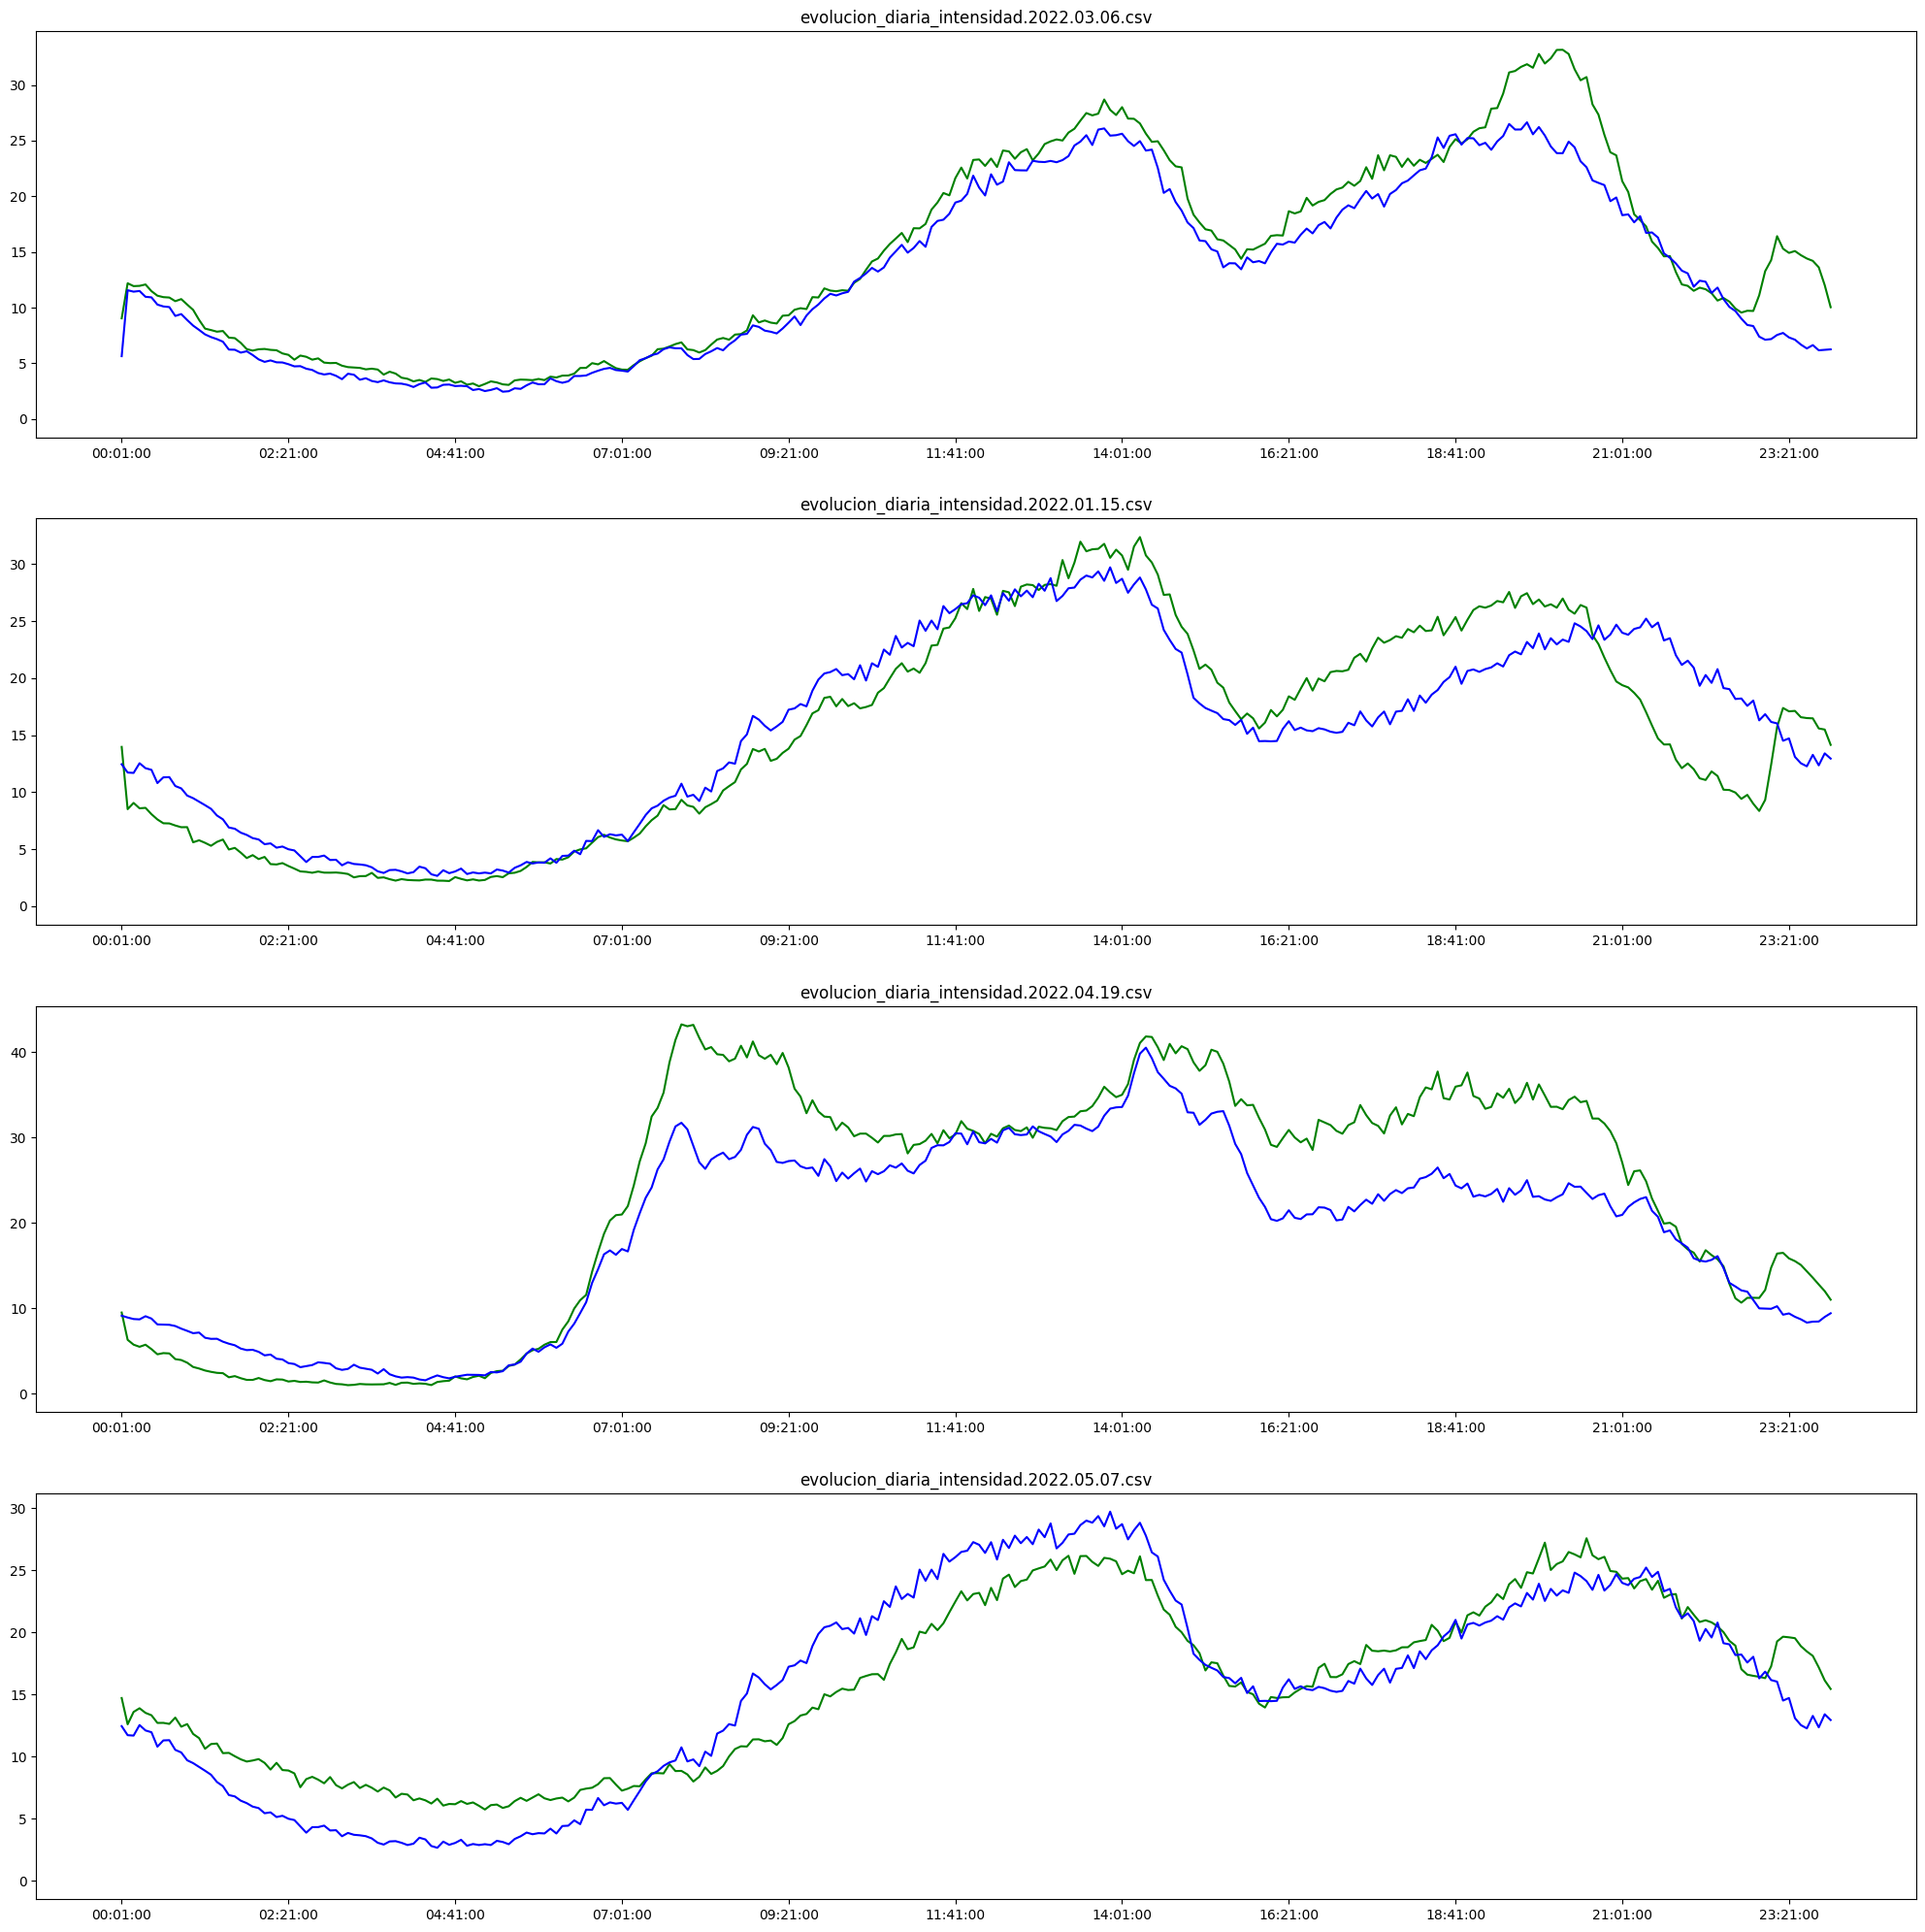

In [15]:
directory = str(inten[0])+'/intensOcupation'

match_day=[datetime.datetime(2022,3,6,0,0),datetime.datetime(2022,1,15,0,0),datetime.datetime(2022,4,19,0,0),datetime.datetime(2022,5,7,0,0),
                datetime.datetime(2022, 2, 13, 0, 0),datetime.datetime(2022, 5, 14, 0, 0),datetime.datetime(2022, 4, 12, 0, 0),datetime.datetime(2022, 5, 14, 0, 0)]
fig,axs=plt.subplots(4,1,figsize=(25,25))
i=0
for v in match_day:
  day=v.day
  month=v.month
  if day<10:
    day='0'+str(day)
  if month<10:
    month='0'+str(month)

  fileSelected='evolucion_diaria_intensidad.'+str(v.year)+'.'+str(month)+'.'+str(day)+'.csv'
  df = pd.read_csv(directory+"/"+fileSelected)
  df = df.loc[:,["intensidad"]]
  dfA = pd.read_csv(directory+"/datAxes.csv")
  dfA = dfA.loc[:,["time", "value"]]
  indices = [i for i in range(0, len(dfA), len(dfA)//10)]

  # Establecer los valores de xticks
  xticks = [dfA.iloc[i]['time'] for i in indices]
  if i>3:
    color='b'
    

  else:
    color='g'
    axs[i].set_title(fileSelected)
    


  oldi=i
  i=i%4
  axs[i].plot(dfA['time'], dfA['value'],alpha=0)
  axs[i].set_xticks(xticks)

  axs[i].plot(df, color=color)
  i=oldi+1